In [3]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Smart_Todo.csv to Cleaned_Smart_Todo.csv


In [4]:
# Load Cleaned Data
import pandas as pd

df = pd.read_csv("Cleaned_Smart_Todo.csv")

# Check if 'priority' exists
if 'priority' not in df.columns:
    import numpy as np
    df['priority'] = np.random.choice(['Low', 'Medium', 'High'], size=len(df))

tasks_df = pd.read_csv("Cleaned_Smart_Todo.csv")
tasks_df.head()

df.head()


,description,Category,Skill,cleaned_text,priority
0,Implement user authentication,backend,spring boot,implement user authentication,High
1,Optimize server performance,backend,asp.net,optimize server performance,Medium
2,Manage database operations,backend,django,manage database operations,High
3,Implement user authentication,backend,api,implement user authentication,Medium
4,Build a microservice,backend,kotlin,build microservice,Medium


In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['cleaned_text'])

y = df['priority']


In [ ]:
# Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Evaluation
from sklearn.metrics import classification_report

print("🔍 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

print("🔍 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


🔍 Random Forest Results:
              precision    recall  f1-score   support

           0       0.32      0.25      0.28      1366
           1       0.32      0.37      0.34      1320
           2       0.35      0.38      0.36      1339

    accuracy                           0.33      4025
   macro avg       0.33      0.33      0.33      4025
weighted avg       0.33      0.33      0.33      4025

🔍 XGBoost Results:
              precision    recall  f1-score   support

           0       0.32      0.24      0.27      1366
           1       0.32      0.35      0.34      1320
           2       0.34      0.39      0.36      1339

    accuracy                           0.33      4025
   macro avg       0.33      0.33      0.32      4025
weighted avg       0.33      0.33      0.32      4025



In [ ]:
# Hyperparameter Tuning (Random Forest Example)
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Save Best Models
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [ ]:
# Downloading best models
from google.colab import files

files.download('random_forest_model.pkl')
files.download('xgboost_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

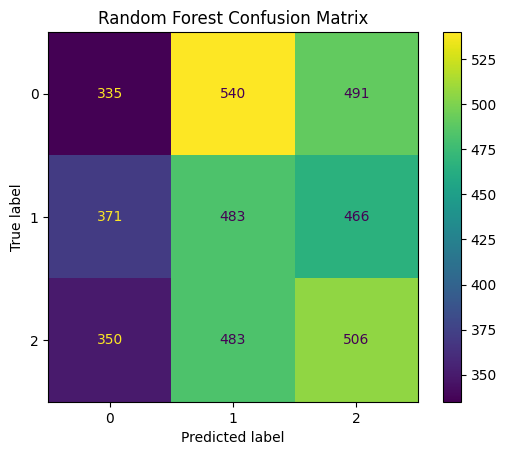

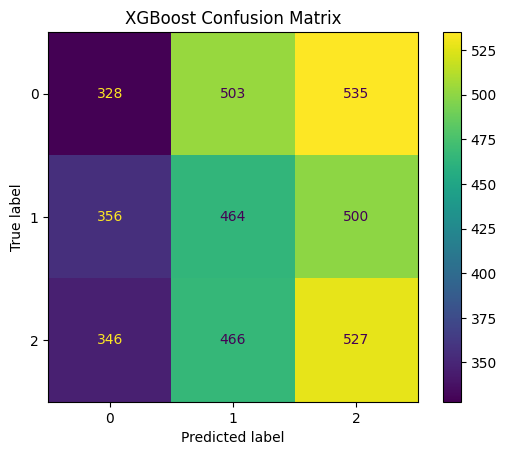

In [ ]:
# Visualize Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()


In [5]:
# Create or Load User Profile Data
# Mock user profile data
user_profiles = pd.DataFrame({
    'user_id': [1, 2, 3, 4],
    'user_name': ['Alice', 'Bob', 'Charlie', 'David'],
    'skills': [['communication', 'planning'],
               ['coding', 'automation'],
               ['writing', 'organization'],
               ['data entry', 'attention']],
    'current_tasks': [2, 3, 1, 4],  # current workload count
})
user_profiles.head()


,user_id,user_name,skills,current_tasks
0,1,Alice,"[communication, planning]",2
1,2,Bob,"[coding, automation]",3
2,3,Charlie,"[writing, organization]",1
3,4,David,"[data entry, attention]",4


In [6]:
# Preprocessing and Extracting Task Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)
task_features = tfidf.fit_transform(tasks_df['cleaned_text']).toarray()


In [7]:
#  Smart Task Assignment Logic
import numpy as np

def assign_task_to_user(task_index, user_df):
    assigned_user = user_df.loc[user_df['current_tasks'].idxmin()]
    user_profiles.at[assigned_user.name, 'current_tasks'] += 1
    return assigned_user['user_name']

assignments = []

for idx in range(len(tasks_df)):
    assigned_user = assign_task_to_user(idx, user_profiles)
    assignments.append(assigned_user)

tasks_df['assigned_to'] = assignments
tasks_df.head()

,description,Category,Skill,cleaned_text,assigned_to
0,Implement user authentication,backend,spring boot,implement user authentication,Charlie
1,Optimize server performance,backend,asp.net,optimize server performance,Alice
2,Manage database operations,backend,django,manage database operations,Charlie
3,Implement user authentication,backend,api,implement user authentication,Alice
4,Build a microservice,backend,kotlin,build microservice,Bob


In [8]:
# Saving Assigned Tasks
tasks_df.to_csv("Week3_Assigned_Tasks.csv", index=False)
user_profiles.to_csv("user_profiles.csv", index=False)


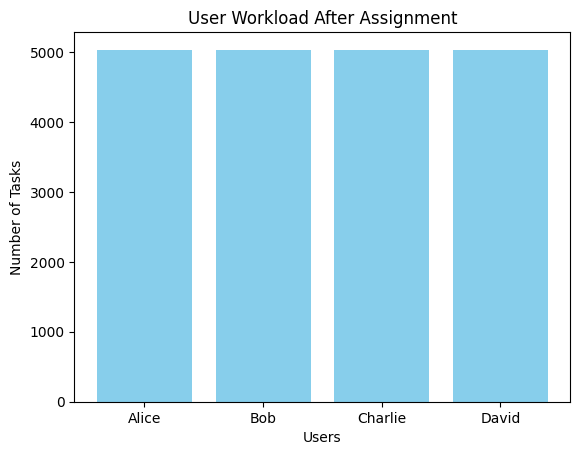

In [9]:
# Visualising workload
import matplotlib.pyplot as plt

plt.bar(user_profiles['user_name'], user_profiles['current_tasks'], color='skyblue')
plt.title("User Workload After Assignment")
plt.ylabel("Number of Tasks")
plt.xlabel("Users")
plt.show()


In [10]:
# Downloading the csv files
from google.colab import files

files.download("Week3_Assigned_Tasks.csv")
files.download("user_profiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Loading the assigned data
tasks_df = pd.read_csv("Week3_Assigned_Tasks.csv")
users_df = pd.read_csv("user_profiles.csv")

tasks_df.head()

,description,Category,Skill,cleaned_text,assigned_to
0,Implement user authentication,backend,spring boot,implement user authentication,Charlie
1,Optimize server performance,backend,asp.net,optimize server performance,Alice
2,Manage database operations,backend,django,manage database operations,Charlie
3,Implement user authentication,backend,api,implement user authentication,Alice
4,Build a microservice,backend,kotlin,build microservice,Bob


In [13]:
# Adding Task Status (Simulate or Real)
import numpy as np

np.random.seed(42)
tasks_df['status'] = np.random.choice(['Pending', 'In Progress', 'Completed'], size=len(tasks_df), p=[0.3, 0.3, 0.4])
tasks_df.head()


,description,Category,Skill,cleaned_text,assigned_to,status
0,Implement user authentication,backend,spring boot,implement user authentication,Charlie,In Progress
1,Optimize server performance,backend,asp.net,optimize server performance,Alice,Completed
2,Manage database operations,backend,django,manage database operations,Charlie,Completed
3,Implement user authentication,backend,api,implement user authentication,Alice,In Progress
4,Build a microservice,backend,kotlin,build microservice,Bob,Pending


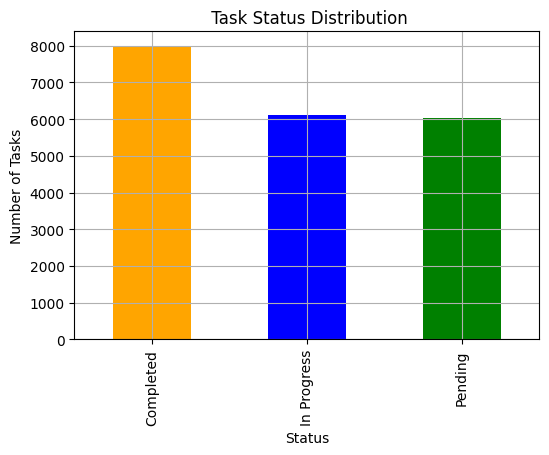

In [14]:
# Plotting Task Status Overview
import matplotlib.pyplot as plt

status_counts = tasks_df['status'].value_counts()

plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title(" Task Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Tasks")
plt.grid(True)
plt.show()


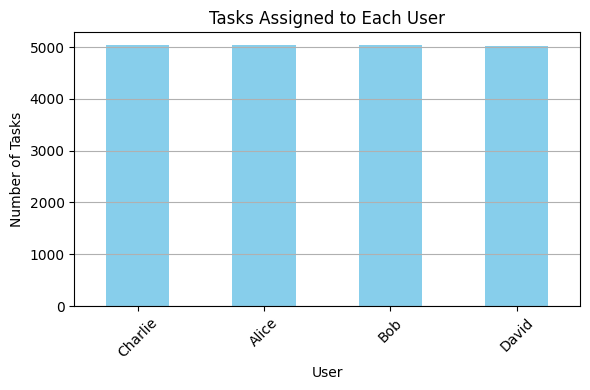

In [15]:
# Visualising tasks assingned per user
user_task_counts = tasks_df['assigned_to'].value_counts()

plt.figure(figsize=(6, 4))
user_task_counts.plot(kind='bar', color='skyblue')
plt.title("Tasks Assigned to Each User")
plt.xlabel("User")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

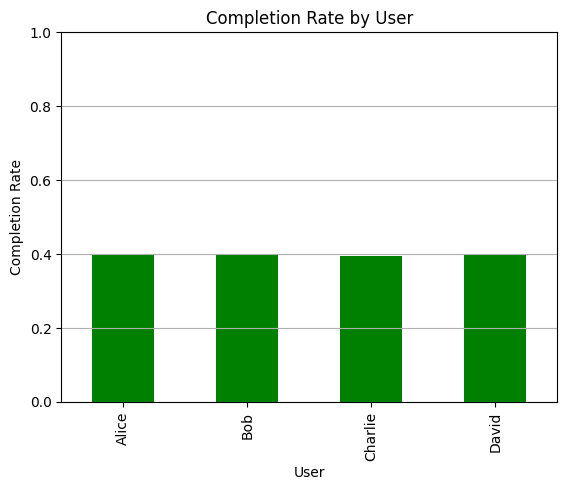

In [16]:
# Completion rate per user
completion_rate = tasks_df[tasks_df['status'] == 'Completed'].groupby('assigned_to').size() / tasks_df.groupby('assigned_to').size()

completion_rate.fillna(0, inplace=True)

completion_rate.plot(kind='bar', color='green')
plt.title("Completion Rate by User")
plt.xlabel("User")
plt.ylabel("Completion Rate")
plt.ylim(0, 1.0)
plt.grid(axis='y')
plt.show()

In [17]:
# Final report csv
tasks_df.to_csv("Week3_Task_Status_Report.csv", index=False)

In [18]:
# Saving the final report
from google.colab import files
files.download("Week3_Task_Status_Report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>